<a href="https://colab.research.google.com/github/shivigup/IUAC-Phase-control/blob/main/Phase_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import glob, os
import scipy
import scipy.stats
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

#pd.options.mode.chained_assignment = None 

In [ ]:
dictionary = []    
filenames = []
os.chdir("drive/MyDrive/IUAC")
files = glob.glob("*.csv")
for a in files:
  #print(a)
  dictionary.append(pd.read_csv(a))
  filenames.append(a)

In [ ]:
total_csv_files = len(dictionary)
phase_column_header = 'Phase Meter-Phase'
for i in range(total_csv_files):
  dictionary[i] = dictionary[i].drop(['DATE/TIME'], axis=1)
  if(dictionary[i][phase_column_header].dtype!='float64'):
    dictionary[i] = dictionary[i].drop([0], axis=0)
    dictionary[i][phase_column_header] = dictionary[i][phase_column_header].str.replace(r'\n$', '')
  dictionary[i][phase_column_header] = pd.to_numeric(dictionary[i][phase_column_header])

In [ ]:
for df_index in range(total_csv_files):
  to_drop = []
  for i in dictionary[df_index].columns:
    if(dictionary[df_index][i].isnull().values.any()):
      to_drop.append(i)
  dictionary[df_index] = dictionary[df_index].drop(columns = to_drop)

In [ ]:
means = []

for i in range(total_csv_files):
  min = np.min(dictionary[i][phase_column_header])
  max = np.max(dictionary[i][phase_column_header])
  #mean = np.mean(dictionary[i][phase_column_header])
  #std = np.std(dictionary[i][phase_column_header])
  circ_mean = scipy.stats.circmean(dictionary[i][phase_column_header], high=360, low=0)
  circ_var = scipy.stats.circvar(dictionary[i][phase_column_header], high=360, low=0)
  #print(filenames[i], dictionary[i].shape[0])
  #print("min_phase = ", min, "max_phase = ", max)
  #print("circular mean = ", circ_mean, "circular std dev = ", np.sqrt(circ_var))
  #print("\n")
  dictionary[i][phase_column_header + '_sin'] = np.sin(2*np.pi*dictionary[i][phase_column_header]/360)
  dictionary[i][phase_column_header + '_cos'] = np.cos(2*np.pi*dictionary[i][phase_column_header]/360)
  means.append(circ_mean)

In [ ]:
del_x = 3.6
interval = 100
upper_bound = means+(del_x+interval)*np.ones(total_csv_files)
lower_bound = means-(del_x+interval)*np.ones(total_csv_files)

#for i in range(total_csv_files):
#  print(upper_bound[i], lower_bound[i])

In [ ]:
# dictionary - contains dataframes 
# 

dictionary_upper = []
for i in range(total_csv_files):
  df = pd.DataFrame(columns = dictionary[i].columns)
  size_dataframe = dictionary[i].shape[0]
  if(means[i] + del_x < 360 and upper_bound[i] > 360):
    #print("other case")
    l_upper = means[i] + del_x
    u_upper = (upper_bound[i])%360
    mask = (dictionary[i][phase_column_header]>l_upper*np.ones(size_dataframe)) | (dictionary[i][phase_column_header]<u_upper*np.ones(size_dataframe))
    #print(mask)
    mask_2 = (dictionary[i][phase_column_header]<u_upper*np.ones(size_dataframe))
    entry = dictionary[i].loc[mask]
    entry.loc[phase_column_header] = entry[phase_column_header] + 360*mask_2
    df = pd.concat([df, entry])
  else:
    l_upper = (means[i] + del_x)%360
    u_upper = (upper_bound[i])%360
    mask = (dictionary[i][phase_column_header]>l_upper*np.ones(size_dataframe)) & (dictionary[i][phase_column_header]<u_upper*np.ones(size_dataframe))
    entry = dictionary[i].loc[mask]
    df = pd.concat([df, entry])
    #print(df)
  dictionary_upper.append(df)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
dictionary_lower = []
for i in range(total_csv_files):
  df = pd.DataFrame(columns = dictionary[i].columns)
  size_dataframe = dictionary[i].shape[0]
  if(means[i] - del_x > 0 and lower_bound[i] < 0):
    #print("other case")
    l_lower = (lower_bound[i])%360
    u_lower = means[i] - del_x
    mask = (dictionary[i][phase_column_header]>l_lower*np.ones(size_dataframe)) | (dictionary[i][phase_column_header]<u_lower*np.ones(size_dataframe))
    mask_2 = (dictionary[i][phase_column_header]<u_lower*np.ones(size_dataframe))
    entry = dictionary[i][mask]
    #entry.loc[phase_column_header] = entry[phase_column_header] - 360*mask_2
    df = pd.concat([df, entry])
  else:
    l_lower = (lower_bound[i])%360
    u_lower = (means[i] - del_x)%360
    mask = (dictionary[i][phase_column_header]>l_lower*np.ones(size_dataframe)) & (dictionary[i][phase_column_header]<u_lower*np.ones(size_dataframe))
    entry = dictionary[i][mask]
    df = pd.concat([df, entry])
    #print(df)
  dictionary_lower.append(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

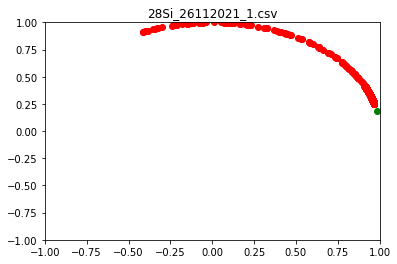

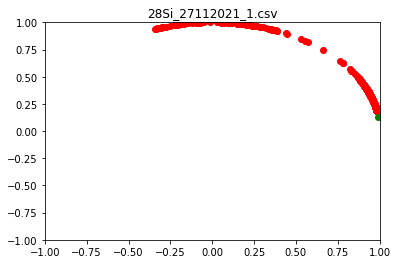

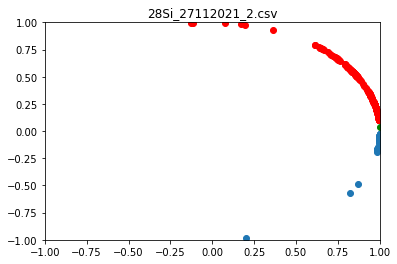

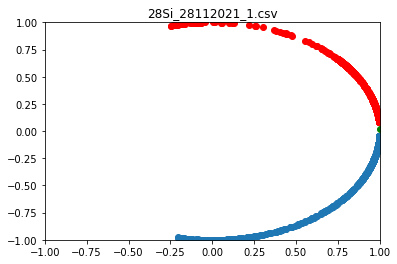

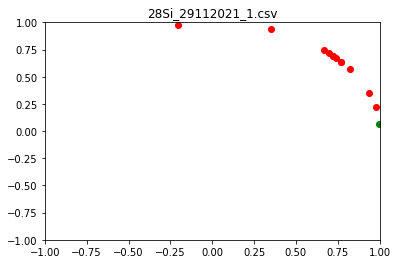

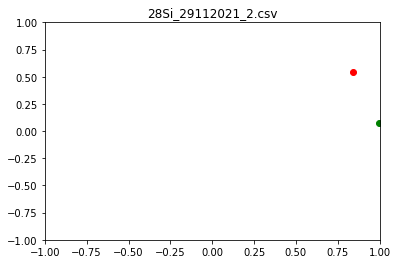

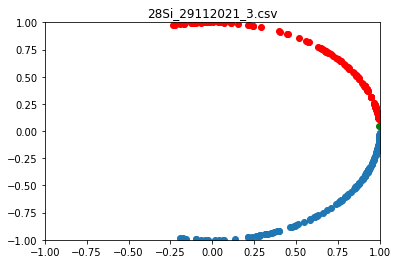

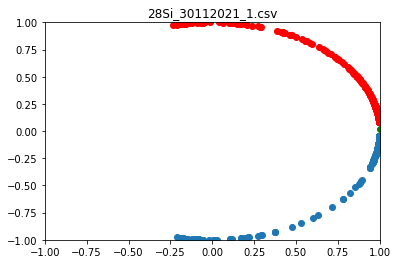

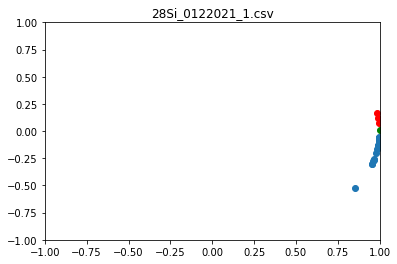

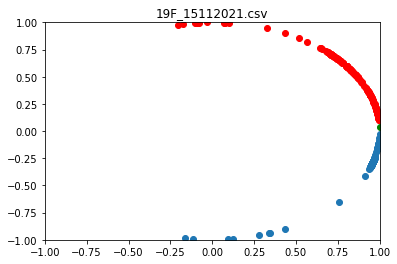

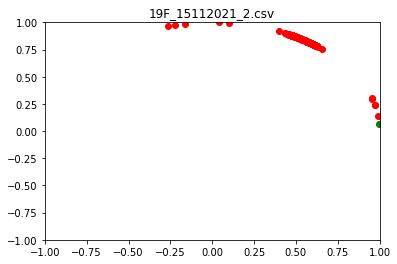

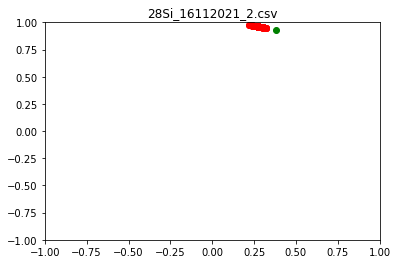

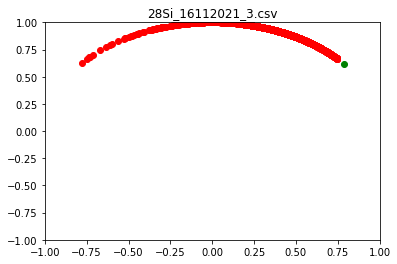

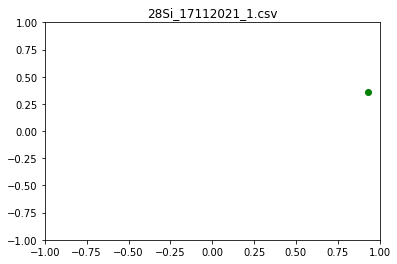

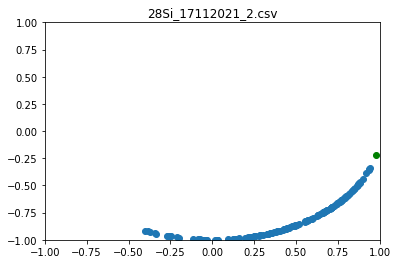

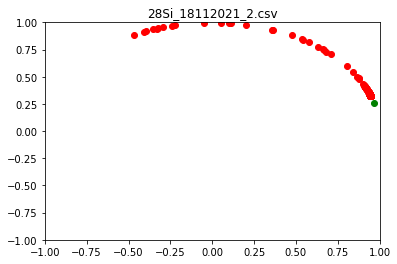

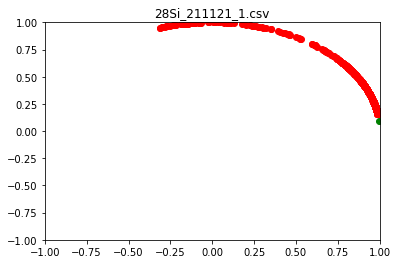

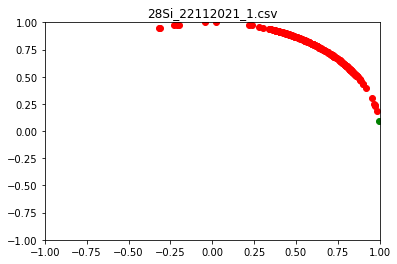

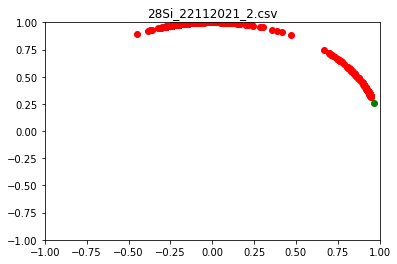

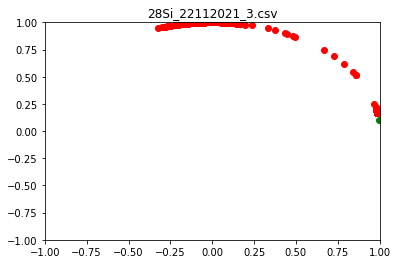

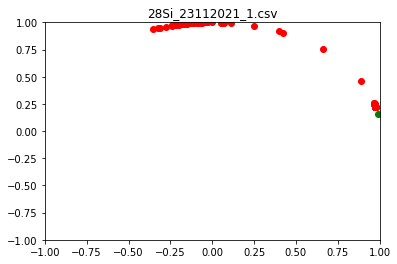

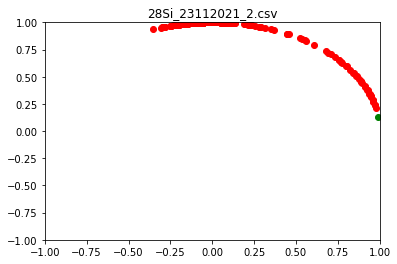

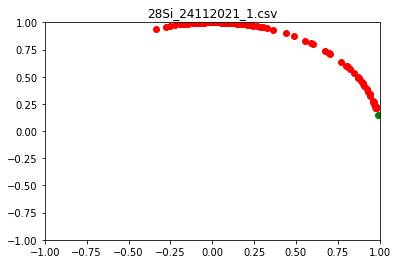

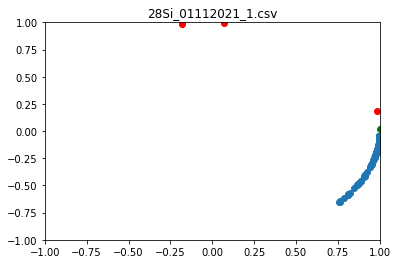

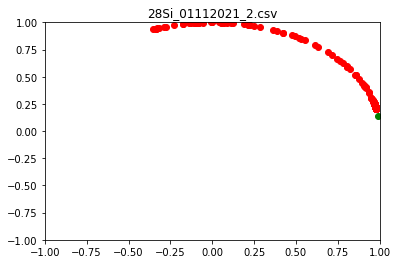

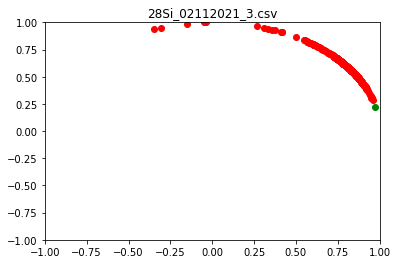

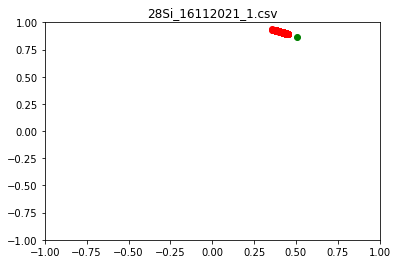

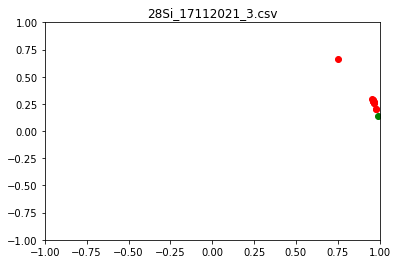

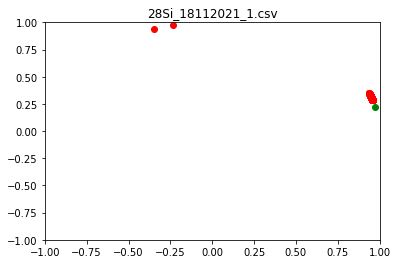

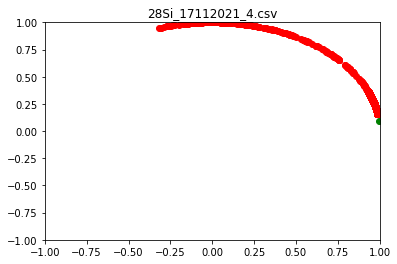

In [ ]:
for i in range(total_csv_files):
  #print(filenames[i])
  plt.figure()
  #dictionary[i][phase_column_header]
  plt.plot(dictionary_lower[i][phase_column_header + '_cos'], dictionary_lower[i][phase_column_header + '_sin'], 'o')
  plt.plot(dictionary_upper[i][phase_column_header + '_cos'], dictionary_upper[i][phase_column_header + '_sin'], 'o', color = 'r')
  plt.plot(np.cos(2*np.pi*means[i]/360), np.sin(2*np.pi*means[i]/360), 'o', color = 'g')
  plt.title(filenames[i])
  plt.xlim(-1, 1)
  plt.ylim(-1, 1)
  plt.show
#means[0]